In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Supply_Chain_Shipment_Pricing_Data.csv')

# for i in df['freight cost (usd)']:
#     print(i)
df.head()


,id,project code,pq #,po / so #,asn/dn #,country,managed by,fulfill via,vendor inco term,shipment mode,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,True,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",True,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,True,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",True,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",True,7590,45450.08,NaN


In [2]:
rows = df.shape[0]
columns = df.shape[1]
print('Rows = ' +str(rows))
print('Columns = ' +str(columns))

Rows = 10324
Columns = 33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10324 non-null  int64  
 1   project code                  10324 non-null  object 
 2   pq #                          10324 non-null  object 
 3   po / so #                     10324 non-null  object 
 4   asn/dn #                      10324 non-null  object 
 5   country                       10324 non-null  object 
 6   managed by                    10324 non-null  object 
 7   fulfill via                   10324 non-null  object 
 8   vendor inco term              10324 non-null  object 
 9   shipment mode                 9964 non-null   object 
 10  pq first sent to client date  10324 non-null  object 
 11  po sent to vendor date        10324 non-null  object 
 12  scheduled delivery date       10324 non-null  object 
 13  d

In [4]:
df.isna().sum()

id                                 0
project code                       0
pq #                               0
po / so #                          0
asn/dn #                           0
country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                    360
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
u

Text(0.5, 1.0, 'Top Ten PEPFAR Manufacturers for Drug Production Orders')

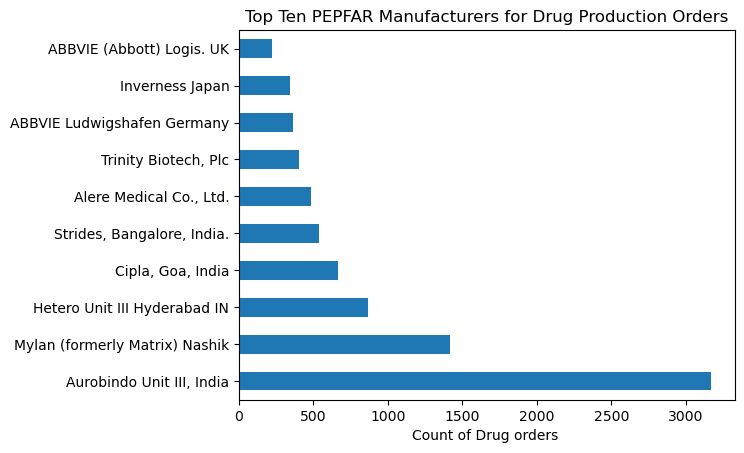

In [5]:
df = df.drop(columns= ['id', 'project code', 'pq #', 'po / so #', 'asn/dn #'], errors= 'ignore')

#df['manufacturing site'].value_counts()

k = np.unique(df['manufacturing site'], return_counts= True)

df['manufacturing site'].value_counts()[:10].plot(kind= 'barh')
plt.xlabel('Count of Drug orders ')
plt.title('Top Ten PEPFAR Manufacturers for Drug Production Orders')

Text(0.5, 0, 'Freight Cost [$]')

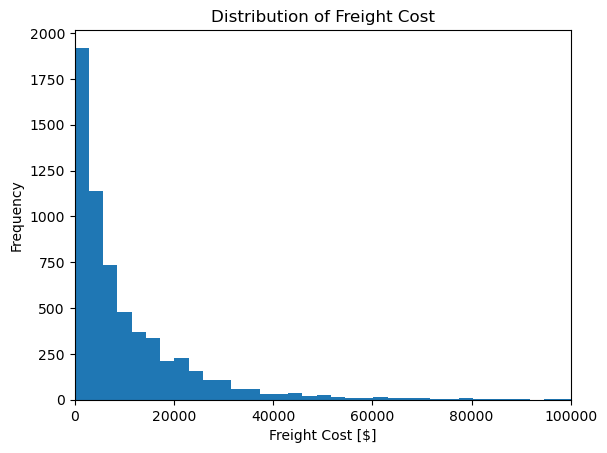

In [6]:
df['freight cost (usd)'].value_counts()

df['freight cost (usd)'] = pd.to_numeric(df['freight cost (usd)'], errors= 'coerce')
df['freight cost (usd)'].plot.hist(bins= int(np.sqrt(df.shape[0])))
df['freight cost (usd)'].value_counts()

plt.title('Distribution of Freight Cost')
plt.xlim(0,100000)
plt.xlabel('Freight Cost [$]')

Text(0.5, 1.0, 'Distribution of Weight')

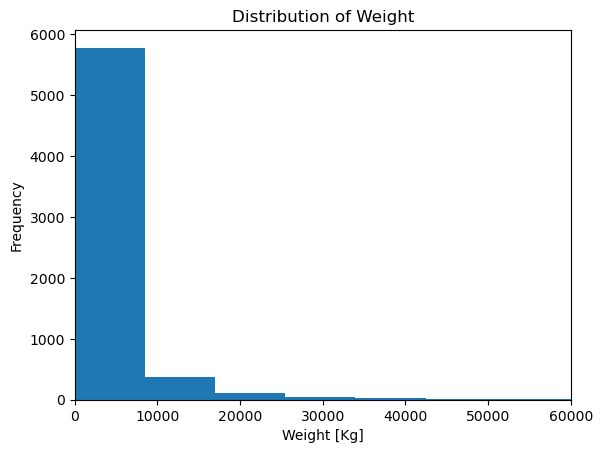

In [7]:
df['weight (kilograms)'] = pd.to_numeric(df['weight (kilograms)'], errors= 'coerce')
df['weight (kilograms)'].plot.hist(bins= int(np.sqrt(df.shape[0])))
df['weight (kilograms)'].value_counts()
plt.xlim(0,60000)
plt.xlabel('Weight [Kg]')
plt.title('Distribution of Weight')

Text(0.5, 1.0, 'Distribution of Unit Price')

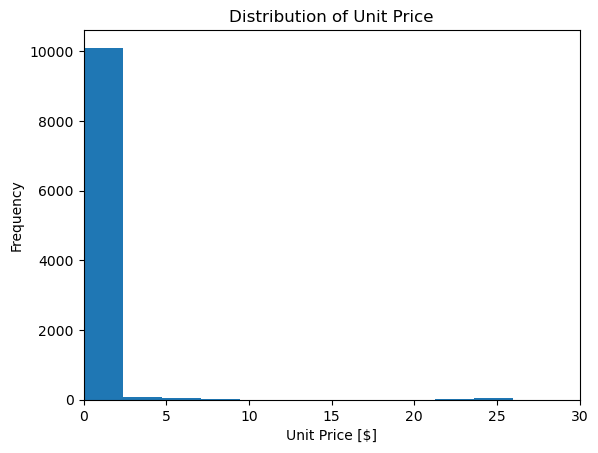

In [8]:
df['unit price'].plot.hist(bins= int(np.sqrt(df.shape[0])))
plt.xlim(0,30)

plt.xlabel('Unit Price [$]')

plt.title('Distribution of Unit Price')


In [9]:
df.isna().sum()

country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                    360
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
unit price                         0
manufacturing site                 0
first line designation             0
weight (kilograms)              3952
freight cost (usd)              4126
l

Text(0.5, 0, 'Drug Order Count')

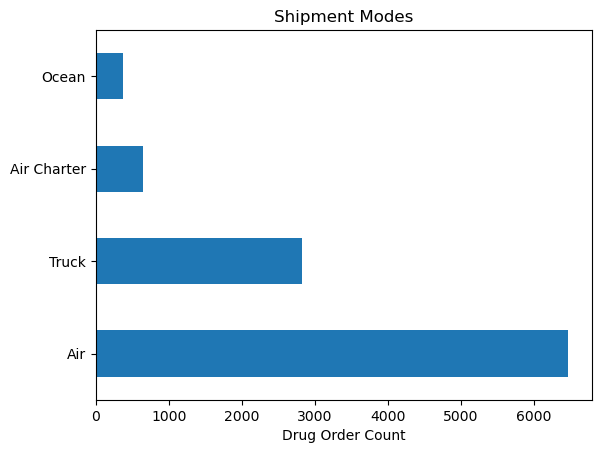

In [10]:
df['shipment mode'] = df['shipment mode'].fillna(df['shipment mode'].mode()[0])



df['shipment mode'].value_counts()[:20].plot(kind= 'barh')
plt.title('Shipment Modes')
plt.xlabel('Drug Order Count')

In [11]:
df.isna().sum()

country                            0
managed by                         0
fulfill via                        0
vendor inco term                   0
shipment mode                      0
pq first sent to client date       0
po sent to vendor date             0
scheduled delivery date            0
delivered to client date           0
delivery recorded date             0
product group                      0
sub classification                 0
vendor                             0
item description                   0
molecule/test type                 0
brand                              0
dosage                          1736
dosage form                        0
unit of measure (per pack)         0
line item quantity                 0
line item value                    0
pack price                         0
unit price                         0
manufacturing site                 0
first line designation             0
weight (kilograms)              3952
freight cost (usd)              4126
l

In [12]:
df.dropna(inplace= True)

df

,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,scheduled delivery date,delivered to client date,delivery recorded date,...,unit of measure (per pack),line item quantity,line item value,pack price,unit price,manufacturing site,first line designation,weight (kilograms),freight cost (usd),line item insurance (usd)
18,Vietnam,PMO - US,Direct Drop,EXW,Air,7/25/2012,8/15/2012,12-Nov-12,12-Nov-12,12-Nov-12,...,60,525,3465.00,6.60,0.11,"Cipla, Goa, India",True,34.0,807.47,4.86
23,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,7/4/2007,15-Oct-07,15-Oct-07,15-Oct-07,...,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",True,941.0,4193.49,3.07
24,Vietnam,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,7/4/2007,27-Aug-07,27-Aug-07,27-Aug-07,...,120,500,41095.00,82.19,0.68,ABBVIE Ludwigshafen Germany,True,117.0,1767.38,65.75
30,Ethiopia,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,10/3/2007,20-Nov-07,20-Nov-07,20-Nov-07,...,60,64000,99200.00,1.55,0.03,"Aurobindo Unit III, India",True,4228.0,12237.61,158.72
33,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,11/19/2007,21-Jan-08,21-Jan-08,21-Jan-08,...,30,1000,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,True,76.0,2282.57,27.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10305,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,10/17/2014,N/A - From RDC,29-May-15,9-Jun-15,15-Jun-15,...,60,300000,2316000.00,7.72,0.13,Hetero Unit III Hyderabad IN,True,39688.0,28277.42,2725.93
10306,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,8/21/2014,N/A - From RDC,29-May-15,15-Jun-15,15-Jun-15,...,30,16006,73467.54,4.59,0.15,"Hetero, Jadcherla, unit 5, IN",True,1504.0,1653.90,75.52
10310,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,11/3/2014,N/A - From RDC,30-Jun-15,4-Jun-15,15-Jun-15,...,60,18000,64800.00,3.60,0.06,Mylan (formerly Matrix) Nashik,True,2253.0,3785.72,76.27
10315,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,9/19/2014,N/A - From RDC,30-Jun-15,15-May-15,22-May-15,...,120,70000,1304800.00,18.64,0.16,ABBVIE Ludwigshafen Germany,True,15198.0,26180.00,1341.33


In [13]:
try:
    for i in ['scheduled delivery date', 'delivered to client date', 'delivery recorded date']:
        df[i] = pd.to_datetime(df[i])
        df[i + ' Year'] = df[i].apply(lambda x: x.year)
        df[i + ' Month'] = df[i].apply(lambda x: x.month)
        df[i + ' Day'] = df[i].apply(lambda x: x.day)
        df = df.drop(i, axis=1)
except:
    print('Already implemented')

In [14]:
df.head()

,country,managed by,fulfill via,vendor inco term,shipment mode,pq first sent to client date,po sent to vendor date,product group,sub classification,vendor,...,line item insurance (usd),scheduled delivery date Year,scheduled delivery date Month,scheduled delivery date Day,delivered to client date Year,delivered to client date Month,delivered to client date Day,delivery recorded date Year,delivery recorded date Month,delivery recorded date Day
18,Vietnam,PMO - US,Direct Drop,EXW,Air,7/25/2012,8/15/2012,ARV,Adult,CIPLA LIMITED,...,4.86,2012,11,12,2012,11,12,2012,11,12
23,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,7/4/2007,ARV,Pediatric,Aurobindo Pharma Limited,...,3.07,2007,10,15,2007,10,15,2007,10,15
24,Vietnam,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,7/4/2007,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),...,65.75,2007,8,27,2007,8,27,2007,8,27
30,Ethiopia,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,10/3/2007,ARV,Adult,Aurobindo Pharma Limited,...,158.72,2007,11,20,2007,11,20,2007,11,20
33,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,11/19/2007,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.",...,27.20,2008,1,21,2008,1,21,2008,1,21


I dont suspect the pq and po delivery dates will hold significance. Ill drop those columns as well.

In [15]:
df.drop(['pq first sent to client date','po sent to vendor date'], axis=1, inplace= True, errors= 'ignore')

df.head()

,country,managed by,fulfill via,vendor inco term,shipment mode,product group,sub classification,vendor,item description,molecule/test type,...,line item insurance (usd),scheduled delivery date Year,scheduled delivery date Month,scheduled delivery date Day,delivered to client date Year,delivered to client date Month,delivered to client date Day,delivery recorded date Year,delivery recorded date Month,delivery recorded date Day
18,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,CIPLA LIMITED,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,...,4.86,2012,11,12,2012,11,12,2012,11,12
23,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,3.07,2007,10,15,2007,10,15,2007,10,15
24,Vietnam,PMO - US,Direct Drop,FCA,Air,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,...,65.75,2007,8,27,2007,8,27,2007,8,27
30,Ethiopia,PMO - US,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,...,158.72,2007,11,20,2007,11,20,2007,11,20
33,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.","Tenofovir Disoproxil Fumarate 300mg [Viread], ...",Tenofovir Disoproxil Fumarate,...,27.20,2008,1,21,2008,1,21,2008,1,21


In [16]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'country': 31,
 'managed by': 1,
 'fulfill via': 2,
 'vendor inco term': 7,
 'shipment mode': 4,
 'product group': 3,
 'sub classification': 4,
 'vendor': 34,
 'item description': 115,
 'molecule/test type': 40,
 'brand': 21,
 'dosage': 51,
 'dosage form': 15,
 'manufacturing site': 52}

Managed by has only one value after the chopping. No need to keep it

In [17]:
df.drop(['managed by'], axis=1, inplace= True, errors= 'ignore')
df.head()

,country,fulfill via,vendor inco term,shipment mode,product group,sub classification,vendor,item description,molecule/test type,brand,...,line item insurance (usd),scheduled delivery date Year,scheduled delivery date Month,scheduled delivery date Day,delivered to client date Year,delivered to client date Month,delivered to client date Day,delivery recorded date Year,delivery recorded date Month,delivery recorded date Day
18,Vietnam,Direct Drop,EXW,Air,ARV,Adult,CIPLA LIMITED,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,...,4.86,2012,11,12,2012,11,12,2012,11,12
23,Vietnam,Direct Drop,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,...,3.07,2007,10,15,2007,10,15,2007,10,15
24,Vietnam,Direct Drop,FCA,Air,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,...,65.75,2007,8,27,2007,8,27,2007,8,27
30,Ethiopia,Direct Drop,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,...,158.72,2007,11,20,2007,11,20,2007,11,20
33,Vietnam,Direct Drop,EXW,Air,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.","Tenofovir Disoproxil Fumarate 300mg [Viread], ...",Tenofovir Disoproxil Fumarate,Viread,...,27.20,2008,1,21,2008,1,21,2008,1,21


Text(0.5, 0, 'Weight [Kg]')

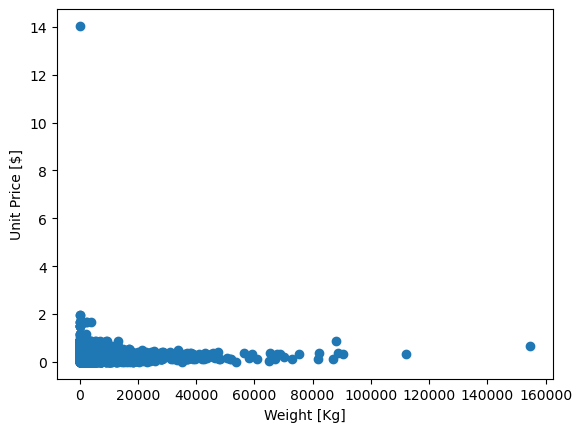

In [18]:
plt.scatter( df['weight (kilograms)'],df['unit price'])
plt.ylabel('Unit Price [$]')
plt.xlabel('Weight [Kg]')

Text(0.5, 0, 'Freight Cost [$]')

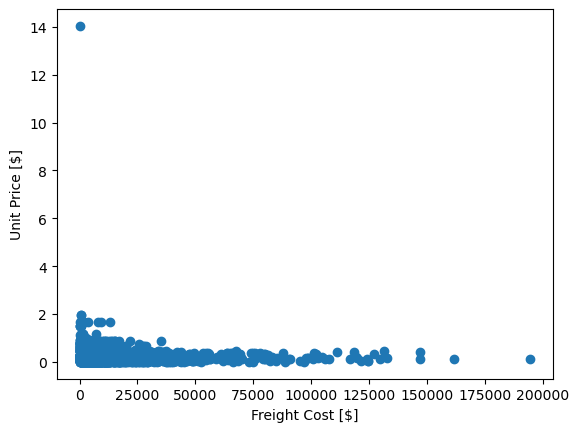

In [19]:
plt.scatter( df['freight cost (usd)'],df['unit price'])
plt.ylabel('Unit Price [$]')
plt.xlabel('Freight Cost [$]')

Text(0.5, 1.0, 'of PEPFAR Drug Unit by Unit Price')

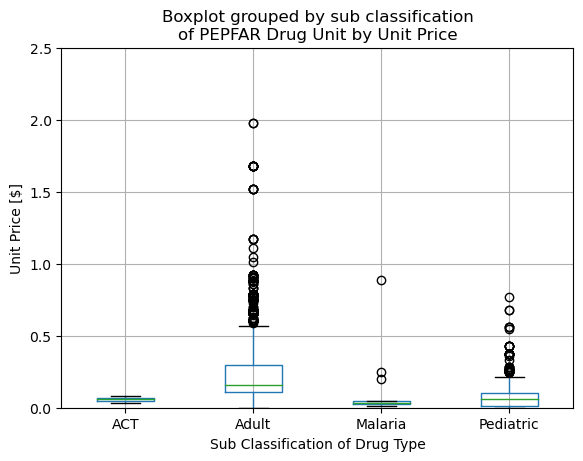

In [20]:
df[['unit price', 'sub classification']].boxplot(by= 'sub classification')

plt.ylim(0,2.5)
plt.xlabel('Sub Classification of Drug Type')
plt.ylabel('Unit Price [$]')
plt.title('of PEPFAR Drug Unit by Unit Price')

Fulfill via is dichotomous. No need of mirroring the two column values generated from it. 





In [21]:
print(df['fulfill via'].unique())
df['fulfill via'] = df['fulfill via'].replace({'Direct Drop': 0 ,'From RDC':1})

df

['Direct Drop' 'From RDC']


,country,fulfill via,vendor inco term,shipment mode,product group,sub classification,vendor,item description,molecule/test type,brand,...,line item insurance (usd),scheduled delivery date Year,scheduled delivery date Month,scheduled delivery date Day,delivered to client date Year,delivered to client date Month,delivered to client date Day,delivery recorded date Year,delivery recorded date Month,delivery recorded date Day
18,Vietnam,0,EXW,Air,ARV,Adult,CIPLA LIMITED,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,...,4.86,2012,11,12,2012,11,12,2012,11,12
23,Vietnam,0,EXW,Air,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,...,3.07,2007,10,15,2007,10,15,2007,10,15
24,Vietnam,0,FCA,Air,ARV,Adult,ABBVIE LOGISTICS (FORMERLY ABBOTT LOGISTICS BV),"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,...,65.75,2007,8,27,2007,8,27,2007,8,27
30,Ethiopia,0,EXW,Air,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,...,158.72,2007,11,20,2007,11,20,2007,11,20
33,Vietnam,0,EXW,Air,ARV,Adult,"GILEAD SCIENCES IRELAND, INC.","Tenofovir Disoproxil Fumarate 300mg [Viread], ...",Tenofovir Disoproxil Fumarate,Viread,...,27.20,2008,1,21,2008,1,21,2008,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10305,Mozambique,1,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,...,2725.93,2015,5,29,2015,6,9,2015,6,15
10306,Mozambique,1,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,Lamivudine/Tenofovir Disoproxil Fumarate 300/3...,Lamivudine/Tenofovir Disoproxil Fumarate,Generic,...,75.52,2015,5,29,2015,6,15,2015,6,15
10310,Uganda,1,N/A - From RDC,Truck,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,...,76.27,2015,6,30,2015,6,4,2015,6,15
10315,Nigeria,1,N/A - From RDC,Air Charter,ARV,Adult,SCMS from RDC,"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",Lopinavir/Ritonavir,Aluvia,...,1341.33,2015,6,30,2015,5,15,2015,5,22


Starting with the shipment mode, we have 360 unfilled values. The EDA showed us that the greater majority of all shipments are done via air. We will replace the null values with the mode of the array, which would be the Air shipment mode.

We have some null values in the target variable freight cost, and we also have some stirngs. Convert the strings to null, and delete them all.

In [22]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'country': 31,
 'vendor inco term': 7,
 'shipment mode': 4,
 'product group': 3,
 'sub classification': 4,
 'vendor': 34,
 'item description': 115,
 'molecule/test type': 40,
 'brand': 21,
 'dosage': 51,
 'dosage form': 15,
 'manufacturing site': 52}

In [23]:
df.columns

Index(['country', 'fulfill via', 'vendor inco term', 'shipment mode',
       'product group', 'sub classification', 'vendor', 'item description',
       'molecule/test type', 'brand', 'dosage', 'dosage form',
       'unit of measure (per pack)', 'line item quantity', 'line item value',
       'pack price', 'unit price', 'manufacturing site',
       'first line designation', 'weight (kilograms)', 'freight cost (usd)',
       'line item insurance (usd)', 'scheduled delivery date Year',
       'scheduled delivery date Month', 'scheduled delivery date Day',
       'delivered to client date Year', 'delivered to client date Month',
       'delivered to client date Day', 'delivery recorded date Year',
       'delivery recorded date Month', 'delivery recorded date Day'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4685 entries, 18 to 10316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         4685 non-null   object 
 1   fulfill via                     4685 non-null   int64  
 2   vendor inco term                4685 non-null   object 
 3   shipment mode                   4685 non-null   object 
 4   product group                   4685 non-null   object 
 5   sub classification              4685 non-null   object 
 6   vendor                          4685 non-null   object 
 7   item description                4685 non-null   object 
 8   molecule/test type              4685 non-null   object 
 9   brand                           4685 non-null   object 
 10  dosage                          4685 non-null   object 
 11  dosage form                     4685 non-null   object 
 12  unit of measure (per pack)      

In [25]:
df['first line designation'].unique()

array([ True])

In [26]:
df = df.drop('first line designation',axis=1,  errors= 'ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4685 entries, 18 to 10316
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         4685 non-null   object 
 1   fulfill via                     4685 non-null   int64  
 2   vendor inco term                4685 non-null   object 
 3   shipment mode                   4685 non-null   object 
 4   product group                   4685 non-null   object 
 5   sub classification              4685 non-null   object 
 6   vendor                          4685 non-null   object 
 7   item description                4685 non-null   object 
 8   molecule/test type              4685 non-null   object 
 9   brand                           4685 non-null   object 
 10  dosage                          4685 non-null   object 
 11  dosage form                     4685 non-null   object 
 12  unit of measure (per pack)      

In [27]:
 for column in df.select_dtypes('object').columns:
        df = pd.concat([df, pd.get_dummies(df[column], prefix= column)], axis=1)
        df = df.drop(column, axis=1, errors= 'ignore')
df

,fulfill via,unit of measure (per pack),line item quantity,line item value,pack price,unit price,weight (kilograms),freight cost (usd),line item insurance (usd),scheduled delivery date Year,...,"manufacturing site_Novartis Pharma AG, Switzerland","manufacturing site_Novartis Pharma Suffern, USA",manufacturing site_Ranbaxy per Shasun Pharma,manufacturing site_Ranbaxy per Shasun Pharma Ltd,"manufacturing site_Ranbaxy, Paonta Shahib, India","manufacturing site_Remedica, Limassol, Cyprus",manufacturing site_Roche Basel,manufacturing site_Roche Madrid,"manufacturing site_Strides, Bangalore, India.","manufacturing site_Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸nland, 0133, Oslo, Norway"
18,0,60,525,3465.00,6.60,0.11,34.0,807.47,4.86,2012,...,0,0,0,0,0,0,0,0,0,0
23,0,240,1000,1920.00,1.92,0.01,941.0,4193.49,3.07,2007,...,0,0,0,0,0,0,0,0,0,0
24,0,120,500,41095.00,82.19,0.68,117.0,1767.38,65.75,2007,...,0,0,0,0,0,0,0,0,0,0
30,0,60,64000,99200.00,1.55,0.03,4228.0,12237.61,158.72,2007,...,0,0,0,0,0,0,0,0,0,0
33,0,30,1000,17000.00,17.00,0.57,76.0,2282.57,27.20,2008,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10305,1,60,300000,2316000.00,7.72,0.13,39688.0,28277.42,2725.93,2015,...,0,0,0,0,0,0,0,0,0,0
10306,1,30,16006,73467.54,4.59,0.15,1504.0,1653.90,75.52,2015,...,0,0,0,0,0,0,0,0,0,0
10310,1,60,18000,64800.00,3.60,0.06,2253.0,3785.72,76.27,2015,...,0,0,0,0,0,0,0,0,0,0
10315,1,120,70000,1304800.00,18.64,0.16,15198.0,26180.00,1341.33,2015,...,0,0,0,0,0,0,0,0,0,0


# Implement the Machine Learning (Data is ready)

In [28]:
y = df['unit price']
X = df.drop('unit price', axis= 1, errors='ignore')


In [29]:
from sklearn.model_selection import train_test_split 
import math

random_state = 1
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

y_val

2958    0.09
6476    0.51
3541    0.22
1081    0.16
5565    0.15
        ... 
7645    0.14
2731    0.36
6956    0.11
7969    0.15
9517    0.19
Name: unit price, Length: 937, dtype: float64

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_val = scaler.transform(X_val)

X_train = pd.DataFrame(scaler.transform(X_train), columns= X_train.columns, index= X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns, index= X_test.index)




C:\Users\muham\anaconda3\envs\data1030\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

k = lr.fit(X_train, y_train)


In [36]:
print('LinearRegression ' + ": {:.2f}%".format(k.score(X_val, y_val) ))

print('LinearRegression ' + ": {:.2f}%".format(k.score(X_test, y_test) ))

LinearRegression : -8257530507147835604992.00%
LinearRegression : -8399541501516942671872.00%


C:\Users\muham\anaconda3\envs\data1030\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
